In [ ]:
# Exploring ratio complexity and balance

In [31]:
from abjad import *
from surge import *
import numpy as np
import pandas
import random
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
% matplotlib inline

In [17]:
def make_ratios(minimum, maximum):
    labels = []
    ratio = []
    hd = []
    slope = []
    for i in range(minimum, maximum+1):
        for c in mathtools.yield_all_compositions_of_integer(i):
            if len(c) > 1:
                r = mathtools.Ratio(c)
                ratio.append(r)
                labels.append(str(r))
                hd.append(ratiotools.harmonic_distance(r))
                X = range(len(r))
                Y = np.cumsum(r)
                m = sp.stats.linregress(X,Y)[0]
                slope.append(m)
                
    d = {'HD':hd,'slope':slope}
    data_frame = pandas.DataFrame(d, index=labels)
    data_frame.index.name = 'labels'
    return data_frame

In [45]:
data_frame = make_ratios(12,12)
len(data_frame)

2047

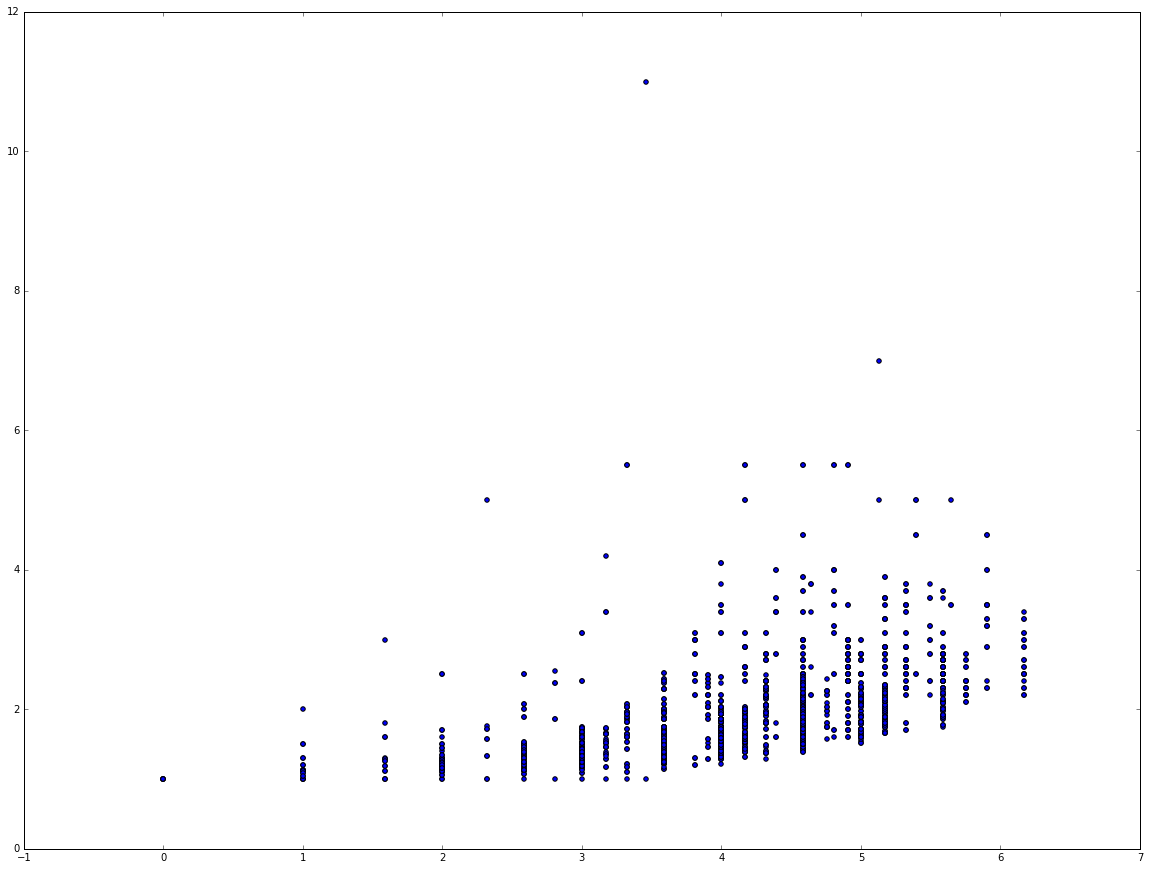

In [46]:
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111)
ax.scatter(data_frame['HD'], data_frame['slope'])

In [47]:
data_frame.head()

,HD,slope
labels,,
11:1,3.459432,1.0
5:1,2.321928,1.0
10:1:1,3.321928,1.0
3:1,1.584963,1.0
9:2:1,4.169925,1.5


In [48]:
knn = KNeighborsClassifier(n_neighbors=10)

In [49]:
knn.fit(data_frame,data_frame.index)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [50]:
data_point = pandas.DataFrame({'HD':[5], 'slope':[6]})

In [51]:
nn = knn.kneighbors(data_point,return_distance=False)

In [52]:
data_frame.ix[nn[0]]

,HD,slope
labels,,
1:6:5,4.906891,5.5
1:5:6,4.906891,5.5
1:7:4,4.807355,5.5
1:4:7,4.807355,5.5
1:3:8,4.584963,5.5
1:8:3,4.584963,5.5
1:9:2,4.169925,5.5
1:2:9,4.169925,5.5
5:7,5.129283,7.0
